# **Project2 - Cars4U**

## Problem Statements.

## Objective  
  
 


  * Explore and visualize the dataset.
  * Build a linear regression model to predict the prices of used cars.
  * Generate a set of insights and recommendations that will help the business.  
  

## Data


**used_cars_data.csv** - It contains the different attributes of used cars sold in different locations. 

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs
 

## Loading libraries

In [1]:
import os
import sys
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Loading and exploring the dataset

### Read the dataset

In [2]:
data = pd.read_csv('used_cars_data.csv')
# copying data to another varaible to avoid any changes to original data
cars4u = data.copy()

In [3]:
# checking the shape of the data
print(f">> There are {cars4u.shape[0]} rows and {cars4u.shape[1]} columns in the loaded data.")

>> There are 7253 rows and 14 columns in the loaded data.


In [4]:
# checking the duplicated data.
cars4u.duplicated().sum()

0

### View the first, last and random 5 rows of the dataset.

In [5]:
cars4u.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [6]:
cars4u.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,86.97,NaN


In [7]:
cars4u.sample(n=5,random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34


### Check the data types of the columns for the dataset.

In [8]:
# checking column datatypes and number of non-null values
cars4u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


* Variable "Mileage", "Engine", and "Power" can remove units and convert them to numeric variables.

### Check the rows that contains missing values

In [9]:
# looking at which columns have the most missing values
cars4u.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

## Data pre-processing

### Columns containing units.

In [10]:
def extract_number(value):
    """This function takes a string and returns a number with units removed.
    If the input string is already numeric, which probably means it's NaN,
    this function just returns np.nan."""

    if isinstance(value, str):  # checks if input value is a string
        try:
            return eval(re.findall('[0-9]+\.{0,1}[0-9]{0,2}',value)[0])
        except:
            return np.nan
    else:  # this happens when the input is np.nan
        return np.nan


In [11]:
cols_with_units = ['Mileage','Engine','Power']

In [12]:
for colname in cols_with_units:
    cars4u[colname] = cars4u[colname].apply(extract_number)

In [13]:
cars4u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [14]:
cars4u.sample(n=5,random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0,1497.0,121.36,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5,1197.0,81.80,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1,2499.0,141.00,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0,2143.0,201.10,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9,1197.0,82.00,5.0,8.23,6.34


### Generating new columns.
* Brand name can be extracted from Name column and changed to category.

In [15]:
# Extract brand name
cars4u['Brand_Name'] = cars4u['Name'].str.upper().str.split(' ',n=1,expand=True)[0]
cars4u['Brand_Name'].value_counts()

MARUTI           1444
HYUNDAI          1340
HONDA             743
TOYOTA            507
MERCEDES-BENZ     380
VOLKSWAGEN        374
FORD              351
MAHINDRA          331
BMW               312
AUDI              285
TATA              228
SKODA             202
RENAULT           170
CHEVROLET         151
NISSAN            117
LAND               67
JAGUAR             48
FIAT               38
MITSUBISHI         36
MINI               31
VOLVO              28
PORSCHE            19
JEEP               19
DATSUN             17
ISUZU               5
FORCE               3
BENTLEY             2
SMART               1
AMBASSADOR          1
LAMBORGHINI         1
HINDUSTAN           1
OPELCORSA           1
Name: Brand_Name, dtype: int64

### Fixing data types.
* Location, Fuel_Type, Transmission, Owner_Type can be changed to catogories.
* Since seats are not infinitely expandable variables and are limited by the type of car, seats were considered categorical variables, not numerical variables.
* converting "object" to "category" reduces the date space.

In [16]:
# object to category
category_cols = ['Location','Fuel_Type','Transmission','Owner_Type','Brand_Name']
for colname in category_cols:
    cars4u[colname] = cars4u[colname].astype('category')
# Seats 
cars4u['Seats'] = cars4u['Seats'].astype('category')

### Drop columns.
  * S.No. was dropped because it is data that explain nothing in itself. 

In [17]:
cars4u.drop(['S.No.'],axis=1,inplace=True)
cars4u.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,MARUTI
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,HYUNDAI
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,HONDA
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,MARUTI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,AUDI


### Missing value treatment.

#### Price

In [18]:
cars4u.drop(cars4u[cars4u.Price.isnull()].index,inplace=True)
cars4u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6017 non-null   float64 
 8   Engine             5983 non-null   float64 
 9   Power              5876 non-null   float64 
 10  Seats              5977 non-null   category
 11  New_Price          6019 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Brand_Name         6019 non-null   category
dtypes: category(6), float64(5), int64(2), object(1)
memory usage: 461.0+ KB


* I removed the rows missing the dependent variable Price item  because it could not be used for creating and validating models.
* Rows that were missing the dependent variable Price item were removed because they could not be used to create and validate the model.
* After removing the rows that have missing values in variable "Price", still, there are rows with missing values in variables "Mileage", "Engine","Power" and "Seats"

#### Mileage

In [19]:
## check rows that contains missing value in Mileage
cars4u[cars4u['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,MAHINDRA
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75,TOYOTA


In [20]:
cars4u[cars4u['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,MAHINDRA
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75,TOYOTA


In [21]:
cars4u.drop(cars4u[cars4u.Fuel_Type == 'Electric'].index, inplace=True)
cars4u['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       0
Name: Fuel_Type, dtype: int64

* Because the mileage notation is ambiguous and there are only 2 pieces of data, the electric vehicle entry has been removed from the dataset.

#### Engine, Power and Seats

In [22]:
## Engine
print (cars4u[cars4u['Engine'].isnull()].shape)
cars4u[cars4u['Engine'].isnull()].head(5)

(36, 14)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,13.58,2.95,HONDA
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,2.11,MARUTI
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,7.88,1.75,MARUTI
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,120.00,26.50,LAND
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,13.58,3.20,HONDA


In [23]:
cars4u.drop(cars4u[cars4u['Engine'].isnull()].index, inplace=True)

* In the rows where the Engine variable was missing, a pattern was identified in which the power and seat variables were also missing.
* All rows missing the Engine variable were deleted.

In [24]:
## Power
print (cars4u[cars4u['Power'].isnull()].shape)
cars4u[cars4u['Power'].isnull()].sample(n=4,random_state=1)

(107, 14)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name
3589,Tata Indica DLS,Hyderabad,2005,100000,Diesel,Manual,Second,13.50,1405.0,NaN,5.0,7.630,1.30,TATA
1649,Toyota Etios Liva GD,Pune,2011,32000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,3.85,TOYOTA
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.80,2953.0,NaN,NaN,35.290,7.00,FORD
3247,Toyota Etios GD,Chennai,2011,79000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,4.67,TOYOTA


In [25]:
cars4u.drop(cars4u[cars4u['Power'].isnull()].index,inplace=True)

* Missing values of the power variable appeared randomly and were not large compared to the total number of data.
* Rows missing the Power variable were deleted.

In [26]:
## Seats
print (cars4u[cars4u['Seats'].isnull()].shape)
cars4u[cars4u['Seats'].isnull()]

(2, 14)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,7.65,3.6,FORD
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0,1493.0,100.0,NaN,13.58,1.7,HONDA


In [27]:
# Add data manualy via web search.
cars4u['Seats'][229] = 5 # https://www.cardekho.com/ford/ford-figo-specifications.htm
cars4u['Seats'][1917] = 5 # https://www.edmunds.com/honda/civic/2005/features-specs/

In [28]:
cars4u.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5874 non-null   object  
 1   Location           5874 non-null   category
 2   Year               5874 non-null   int64   
 3   Kilometers_Driven  5874 non-null   int64   
 4   Fuel_Type          5874 non-null   category
 5   Transmission       5874 non-null   category
 6   Owner_Type         5874 non-null   category
 7   Mileage            5874 non-null   float64 
 8   Engine             5874 non-null   float64 
 9   Power              5874 non-null   float64 
 10  Seats              5874 non-null   category
 11  New_Price          5874 non-null   float64 
 12  Price              5874 non-null   float64 
 13  Brand_Name         5874 non-null   category
dtypes: category(6), float64(5), int64(2), object(1)
memory usage: 579.0+ KB


## Exploratory Data Analysis - Univariate Analysis

In [29]:
def hist_box(data,feature,figsize=(12,7),kde=False,bins=None):
  '''

  show histogram & boxplot at once

  data : dataframe
  feature : column name
  figsize ; figure size (default (12,7))
  kde : whether to show density curve ( default false )
  bins : bin numbers ( default None)

  '''

  fs,(ax_box,ax_hist) = plt.subplots(nrows=2,
             sharex=True,
             figsize=(12,7),
             gridspec_kw={"height_ratios": (0.3, 0.7)})
  sns.boxplot(data=data,ax=ax_box,x=feature,showmeans=True,color='violet')
  if bins:
    sns.histplot(data=data,ax=ax_hist,x=feature,bins=bins,kde=kde)
  else:
    sns.histplot(data=data,ax=ax_hist,x=feature,kde=kde)
  ax_hist.axvline(data[feature].mean(), color="green", linestyle="--") ## draw a green dotted line of mean
  ax_hist.axvline(data[feature].median(), color="black", linestyle="-") ## draw a black straight line of median
  plt.show()

In [30]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Year

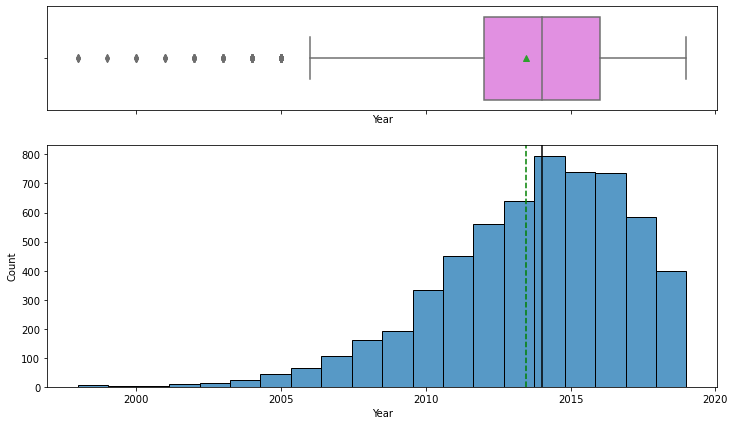

In [31]:
hist_box(cars4u,'Year',bins=20)

#### Kilometers_Driven

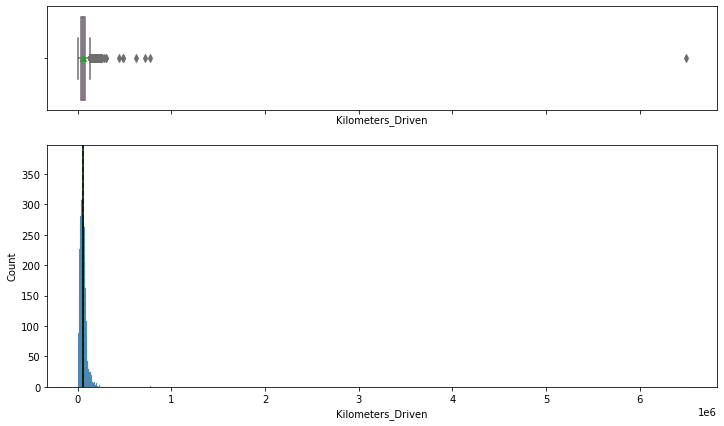

In [32]:
hist_box(cars4u,'Kilometers_Driven')

* Some outliers have been observed that deviate very much from the distribution.

#### Mileage

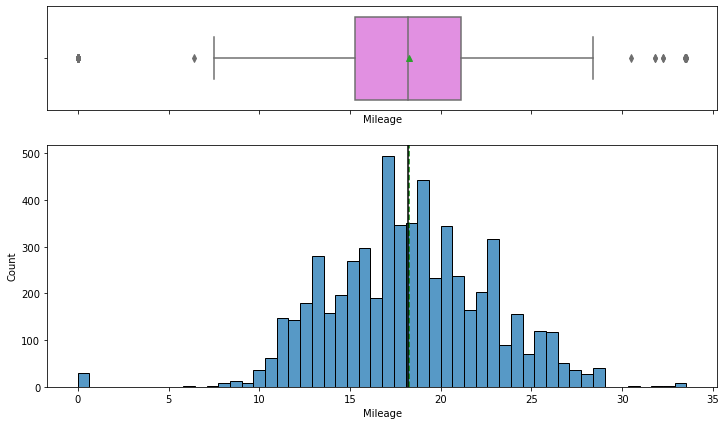

In [33]:
hist_box(cars4u,'Mileage')

* Several outliers are observed, but generally appear to follow a normal distribution.

#### Engine

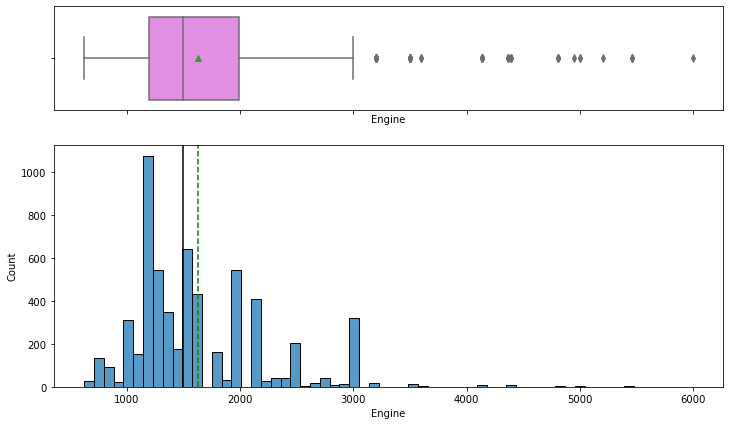

In [34]:
hist_box(cars4u,'Engine')

* A right skew distribution was observed in Engine variable.

#### Power

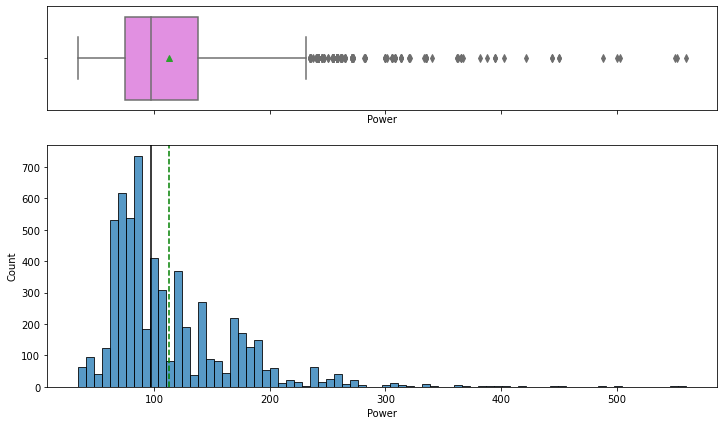

In [35]:
hist_box(cars4u,'Power')

* A right skew distribution was observed in Power variable.

#### New_Price

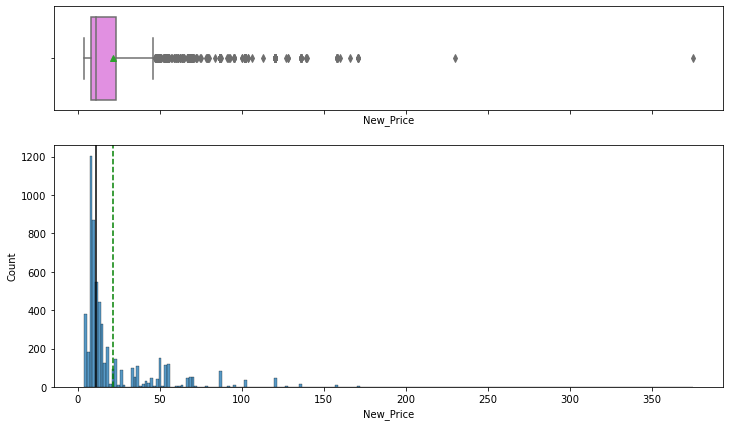

In [36]:
hist_box(cars4u,'New_Price')

* The distribution of New_Price seems to be highly right-skewed.

#### Price

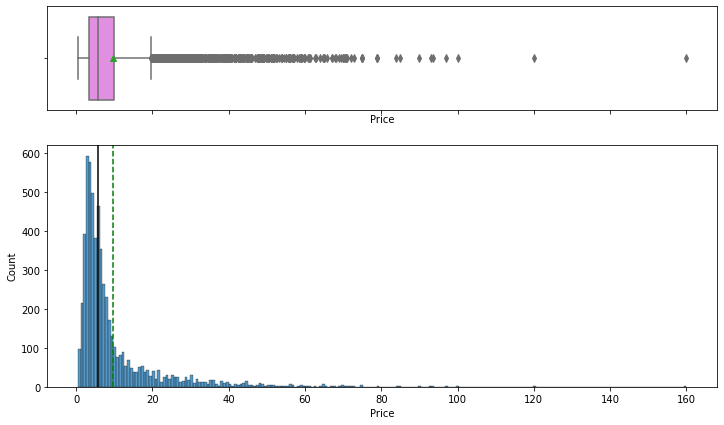

In [37]:
hist_box(cars4u,'Price')

* The distribution of Price seems to be highly right-skewed.

* The distribution of Reduced_Price seems to be highly right-skewed.

#### Locations

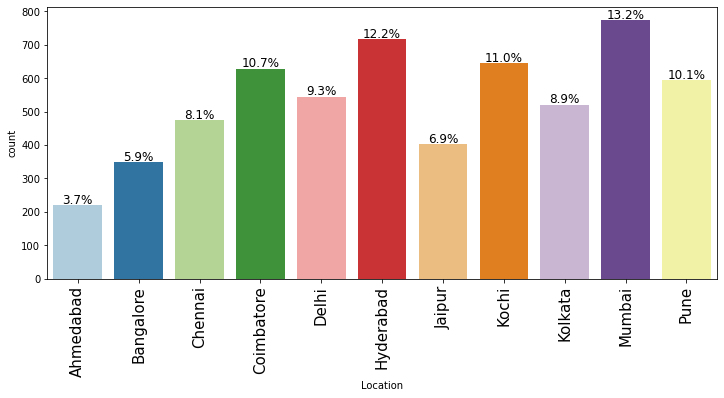

In [38]:
labeled_barplot(cars4u, 'Location', perc=True)

* There is a variation in used car sales by region, with used car sales appearing to be the most in Mumbai and the least in Ahmedabad.

#### Fuel_Type

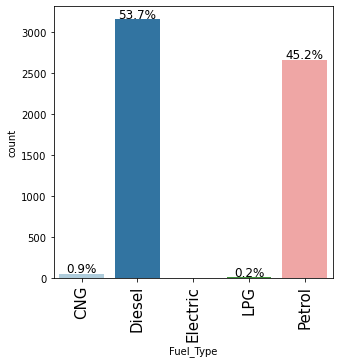

In [39]:
labeled_barplot(cars4u, 'Fuel_Type', perc=True)

* The fuel type of most vehicles sold is diesel or petrol, and there is not much difference between diesel and petrol.

#### Transmission

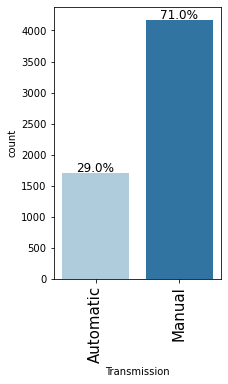

In [40]:
labeled_barplot(cars4u, 'Transmission', perc=True)

* More than 70% of the cars sold use manual transmission.

#### Owner_Type

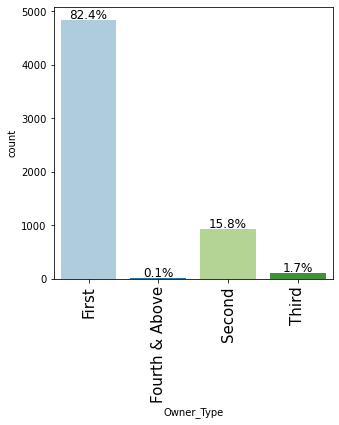

In [41]:
labeled_barplot(cars4u, 'Owner_Type', perc=True)

* Of the used cars sold, more than 80 percent are sold as used cars for the first time, and about 16 percent are second-sold.

#### Seats

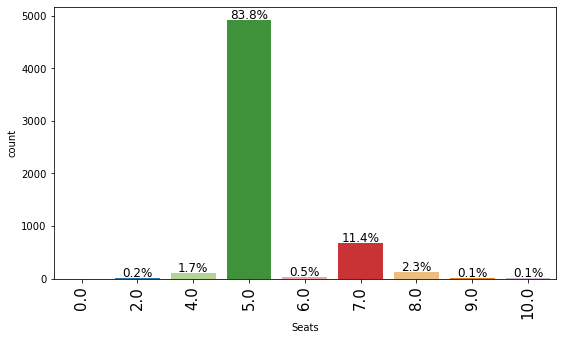

In [42]:
labeled_barplot(cars4u, 'Seats', perc=True)

* More than 80 percent of used cars sold are 5-seaters, and 7-seaters account for about 10 percent.

#### Brand_Name

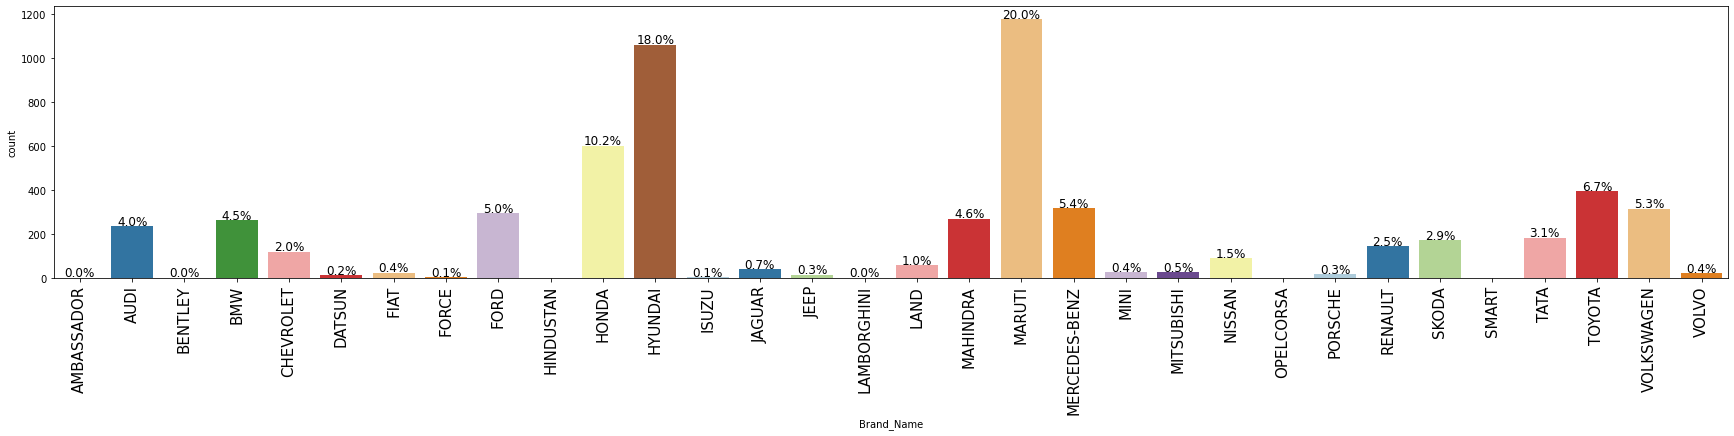

In [43]:
labeled_barplot(cars4u, 'Brand_Name', perc=True)

* There is a variation in the number of used cars sold by brand, with the MARUTI brand accounting for the largest distribution at around 20%, followed by the HYUNDAI brand accounting for about 18%. 

### Outlier & Suspicious Value Treatment.

In [44]:
cars4u.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5874,1812,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5874,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5874.0,NaN,NaN,NaN,2013.476507,3.166025,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5874.0,NaN,NaN,NaN,58324.115594,92154.6643,171.0,33431.25,52621.5,72408.25,6500000.0
Fuel_Type,5874,4,Diesel,3153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5874,2,Manual,4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5874,4,First,4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5874.0,NaN,NaN,NaN,18.273829,4.371965,0.0,15.26,18.2,21.1,33.54
Engine,5874.0,NaN,NaN,NaN,1625.701226,601.544134,624.0,1198.0,1495.5,1991.0,5998.0
Power,5874.0,NaN,NaN,NaN,113.272201,53.873317,34.2,75.0,97.7,138.1,560.0


* The maximum value of  6500000 Kilometers_Driven and minimum value of 0 Mileage are expected to be incorrect values.

#### New_Price < Price

In [45]:
cars4u[cars4u['New_Price']<cars4u['Price']].shape

(73, 14)

In [46]:
cars4u.drop(cars4u[cars4u['New_Price']<cars4u['Price']].index,inplace=True)

* In some cases, the price of a used car may rise slightly compared to the price of a new car, but the current data also mixes data that appears to be clearly wrong. 
* In addition, the corresponding row was deleted because there are not many cases in which Reduced_Price has a negative value compared to the total number of data. 

In [47]:
cars4u.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5801,1789,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5801,11,Mumbai,770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5801.0,NaN,NaN,NaN,2013.443717,3.164563,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5801.0,NaN,NaN,NaN,57380.35649,37422.586626,171.0,33915.0,53000.0,72524.0,775000.0
Fuel_Type,5801,4,Diesel,3101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5801,2,Manual,4141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5801,4,First,4773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5801.0,NaN,NaN,NaN,18.282553,4.35216,0.0,15.29,18.3,21.1,33.54
Engine,5801.0,NaN,NaN,NaN,1619.52784,592.89021,624.0,1198.0,1495.0,1984.0,5998.0
Power,5801.0,NaN,NaN,NaN,112.518292,52.541148,34.2,75.0,94.0,138.1,552.0


* In the process of deleting rows with suspicious Price and New_Price, rows with the suspicious Kilometers_Driven values were accidentally deleted as well.

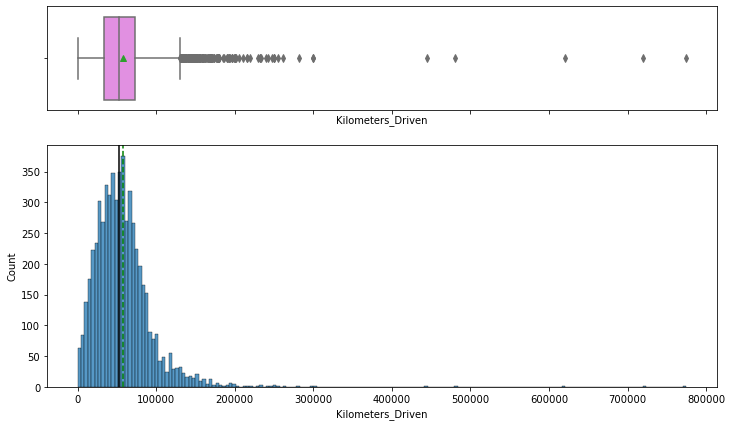

In [48]:
# Check Kilometers_Driven
hist_box(cars4u,'Kilometers_Driven')

#### Mileage

In [49]:
cars4u[cars4u['Mileage'] == 0].shape

(29, 14)

In [50]:
cars4u.drop(cars4u[cars4u['Mileage'] == 0].index,inplace=True)
cars4u.reset_index(inplace=True, drop=True)
cars4u.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5772,1779,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5772,11,Mumbai,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5772.0,NaN,NaN,NaN,2013.446639,3.163772,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5772.0,NaN,NaN,NaN,57383.637214,37429.169507,171.0,34000.0,53000.0,72563.75,775000.0
Fuel_Type,5772,4,Diesel,3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5772,2,Manual,4133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5772,4,First,4751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5772.0,NaN,NaN,NaN,18.374409,4.165139,7.5,15.3,18.46,21.1,33.54
Engine,5772.0,NaN,NaN,NaN,1616.571379,590.140215,624.0,1198.0,1493.0,1968.0,5998.0
Power,5772.0,NaN,NaN,NaN,112.377959,52.46441,34.2,75.0,94.0,138.1,552.0


* The rows with zero mileage was dropped because it was too large to manually add, but small relative to the total data.

## Bining

#### Seats

In [51]:
seats = {
    2:'2 seater',
    4:'4to5 seater', 5:'4to5 seater',
    6:'6to7 seater', 7:'6to7 seater',
    8:'Above 8 seater' , 9:'Above 8 seater' ,10:'Above 8 seater'
}

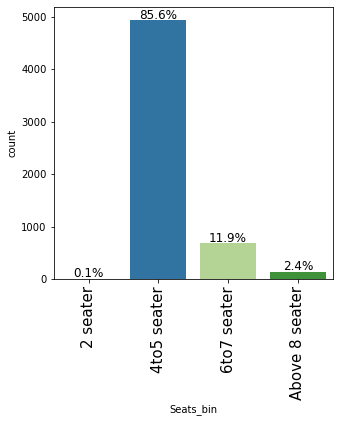

In [52]:
cars4u['Seats_bin'] = cars4u['Seats'].replace(seats).astype('category')
labeled_barplot(cars4u, 'Seats_bin', perc=True)

In [53]:
cars4u.drop('Seats',axis=1,inplace=True)

#### Location


In [54]:
locations = {'Mumbai':'West',
             'Hyderabad':'Center',
             'Kochi':'South',
             'Coimbatore':'South',
             'Pune':'West',
             'Delhi':'North',
             'Kolkata':'East',
             'Chennai':'South',
             'Jaipur':'North',
             'Bangalore':'South',
             'Ahmedabad':'West'}

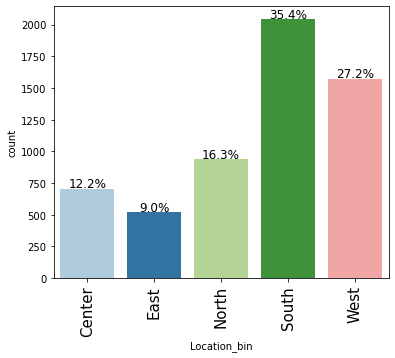

In [55]:
cars4u['Location_bin'] = cars4u['Location'].replace(locations).astype('category')
labeled_barplot(cars4u, 'Location_bin', perc=True)

* It has been observed that used car trading in southern India is the most active and the least in eastern India.

In [56]:
cars4u.drop('Location',axis=1,inplace=True)

## Log Transformation

* Some features are very skewed and will likely behave better on the log scale.

#### Engine, Power, Price, New_Price and Reduced_Price

In [57]:
cols_to_log = ['Engine','Power','Price','New_Price']

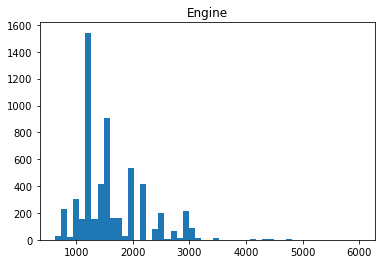

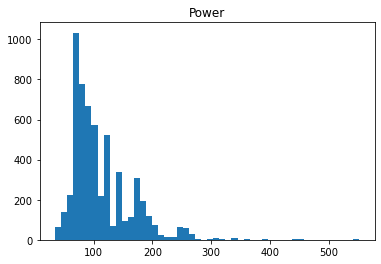

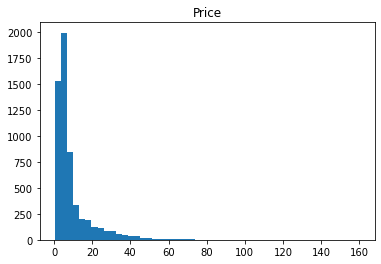

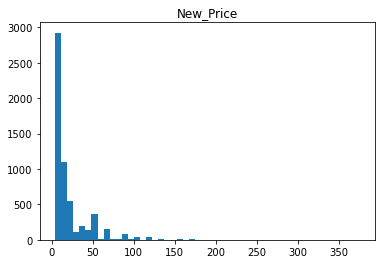

In [58]:
for colname in cols_to_log:
    plt.hist(cars4u[colname], bins=50)
    plt.title(colname)
    plt.show()

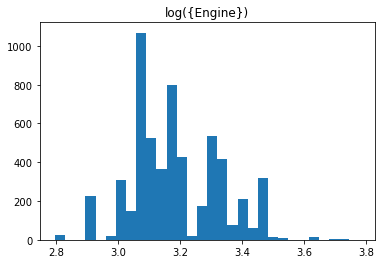

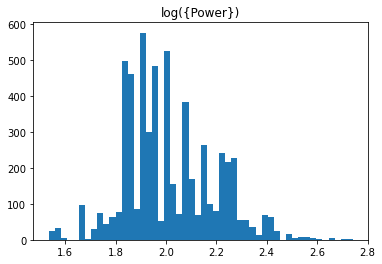

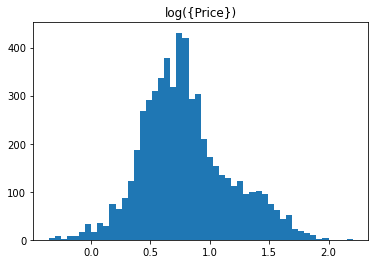

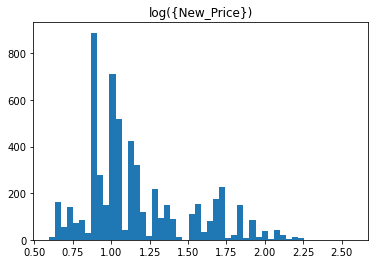

In [59]:
plt.hist(np.log10(cars4u['Engine']), 30)
plt.title('log({Engine})')
plt.show()
plt.hist(np.log10(cars4u['Power']), 50)
plt.title('log({Power})')
plt.show()
plt.hist(np.log10(cars4u['Price']), 50)
plt.title('log({Price})')
plt.show()
plt.hist(np.log10(cars4u['New_Price']), 50)
plt.title('log({New_Price})')
plt.show()


* The skewness of the distributions appears to have decreased after the log transformation, and the corresponding variable has been applied to the log transformation.

In [60]:
for colname in cols_to_log:
    cars4u[colname + '_log'] = np.log10(cars4u[colname])

In [61]:
cars4u.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5772,1779,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5772.0,NaN,NaN,NaN,2013.446639,3.163772,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5772.0,NaN,NaN,NaN,57383.637214,37429.169507,171.0,34000.0,53000.0,72563.75,775000.0
Fuel_Type,5772,4,Diesel,3082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5772,2,Manual,4133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5772,4,First,4751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5772.0,NaN,NaN,NaN,18.374409,4.165139,7.5,15.3,18.46,21.1,33.54
Engine,5772.0,NaN,NaN,NaN,1616.571379,590.140215,624.0,1198.0,1493.0,1968.0,5998.0
Power,5772.0,NaN,NaN,NaN,112.377959,52.46441,34.2,75.0,94.0,138.1,552.0
New_Price,5772.0,NaN,NaN,NaN,21.487611,24.118083,3.91,8.0975,11.3,21.77,375.0


## Feature Engineering

* The volume and power of the engine are closely related to each other and can be represented by the output instead.
* To combine them into a single feature, the units of Power and Engine were different, so transformation was used.
* Since z-transformation can have a value of less than 0, min-max scaling was used.

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [63]:
cars4u[['Power_scaled','Engine_scaled']] = MinMaxScaler().fit_transform(
    cars4u[['Power','Engine']]
)
cars4u['Output'] = cars4u['Power_scaled']+cars4u['Engine_scaled']
cars4u[['Power_log_scaled','Engine_log_scaled']] = MinMaxScaler().fit_transform(
    cars4u[['Power_log','Engine_log']]
)
cars4u['Output_log'] = cars4u['Power_log_scaled']+cars4u['Engine_log_scaled']


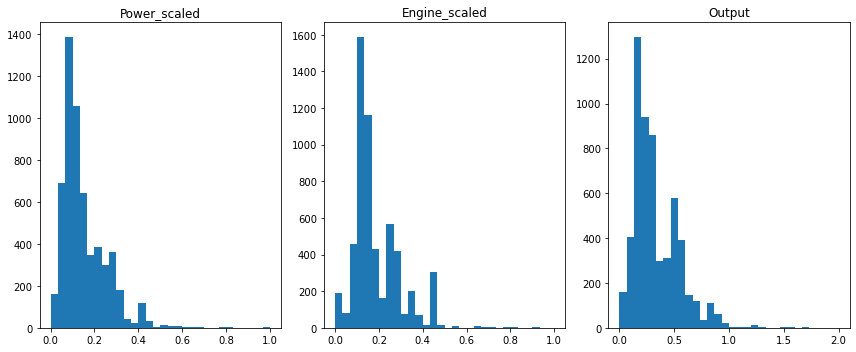

In [64]:
show_columns = ['Power_scaled','Engine_scaled','Output']
plt.figure(figsize=(12,5))

for i, variable in enumerate(show_columns):
    plt.subplot(1, 3, i + 1)
    plt.hist(cars4u[variable],bins=30)
    plt.tight_layout()
    plt.title(variable)

plt.show()

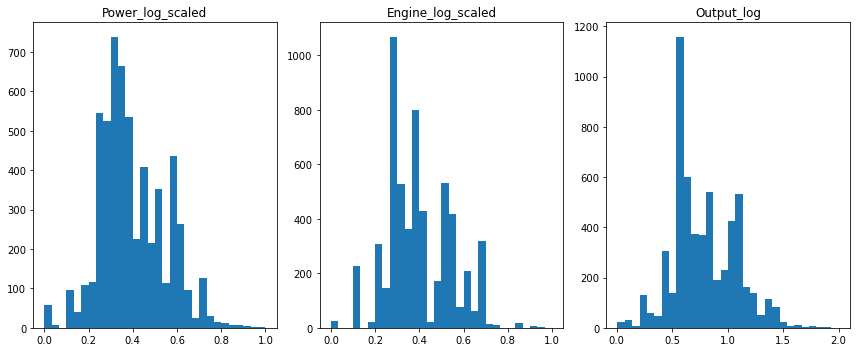

In [65]:
show_columns = ['Power_log_scaled','Engine_log_scaled','Output_log']
plt.figure(figsize=(12,5))

for i, variable in enumerate(show_columns):
    plt.subplot(1, 3, i + 1)
    plt.hist(cars4u[variable],bins=30)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Remove 0-count category in data by reset

In [66]:
cars4u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5772 entries, 0 to 5771
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5772 non-null   object  
 1   Year               5772 non-null   int64   
 2   Kilometers_Driven  5772 non-null   int64   
 3   Fuel_Type          5772 non-null   category
 4   Transmission       5772 non-null   category
 5   Owner_Type         5772 non-null   category
 6   Mileage            5772 non-null   float64 
 7   Engine             5772 non-null   float64 
 8   Power              5772 non-null   float64 
 9   New_Price          5772 non-null   float64 
 10  Price              5772 non-null   float64 
 11  Brand_Name         5772 non-null   category
 12  Seats_bin          5772 non-null   category
 13  Location_bin       5772 non-null   category
 14  Engine_log         5772 non-null   float64 
 15  Power_log          5772 non-null   float64 
 16  Price_

In [67]:
categorical_features = ['Location_bin','Fuel_Type','Transmission','Owner_Type','Brand_Name','Seats_bin']
for colname in categorical_features:
    cars4u[colname] = cars4u[colname].astype('object').astype('category')

## Exploratory Data Analysis - Bivariate Analysis

### Heatmap

In [68]:
corr_cols = ['Year','Kilometers_Driven','Mileage','Engine','Engine_log','Power','Power_log','Output','Output_log','New_Price','New_Price_log','Price','Price_log']

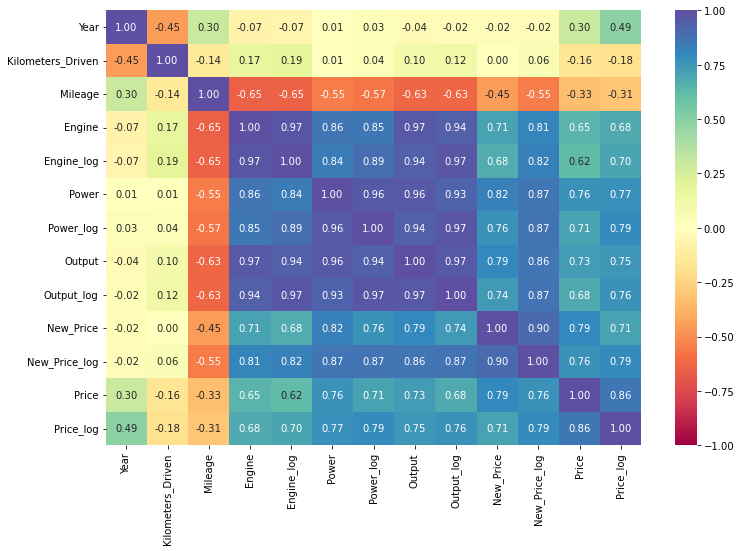

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    cars4u[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Kilometers_Driven and Mileage have a negative correlation with Price.
* The remaining variables have a positive correlation with Price.
* In particular, among the variables that have a positive correlation with Price, the remaining variables excluding Year show a strong correlation of about 0.7 or more.
* In the skewed data, I verified that the variables that applied log transformation showed a higher correlation. (e.g. Price ~ Power = 0.76 VS Price_log ~ Power_log = 0.79 )
* Instead of the original variable, the variable to which the log conversion was applied was preserved.

In [70]:
cols_to_log = ['Engine','Power','Price','New_Price','Output']
cars4u.drop(cols_to_log, axis=1, inplace=True) # remove original variable that are log-transformed.
cols_to_scale = ['Engine_log','Power_log','Engine_scaled','Power_scaled','Engine_log_scaled','Power_log_scaled']
cars4u.drop(cols_to_scale, axis=1, inplace=True) # remove temporary variable that are used to generate Output

### Pairplot

#### by Fuel_Type

<Figure size 864x864 with 0 Axes>

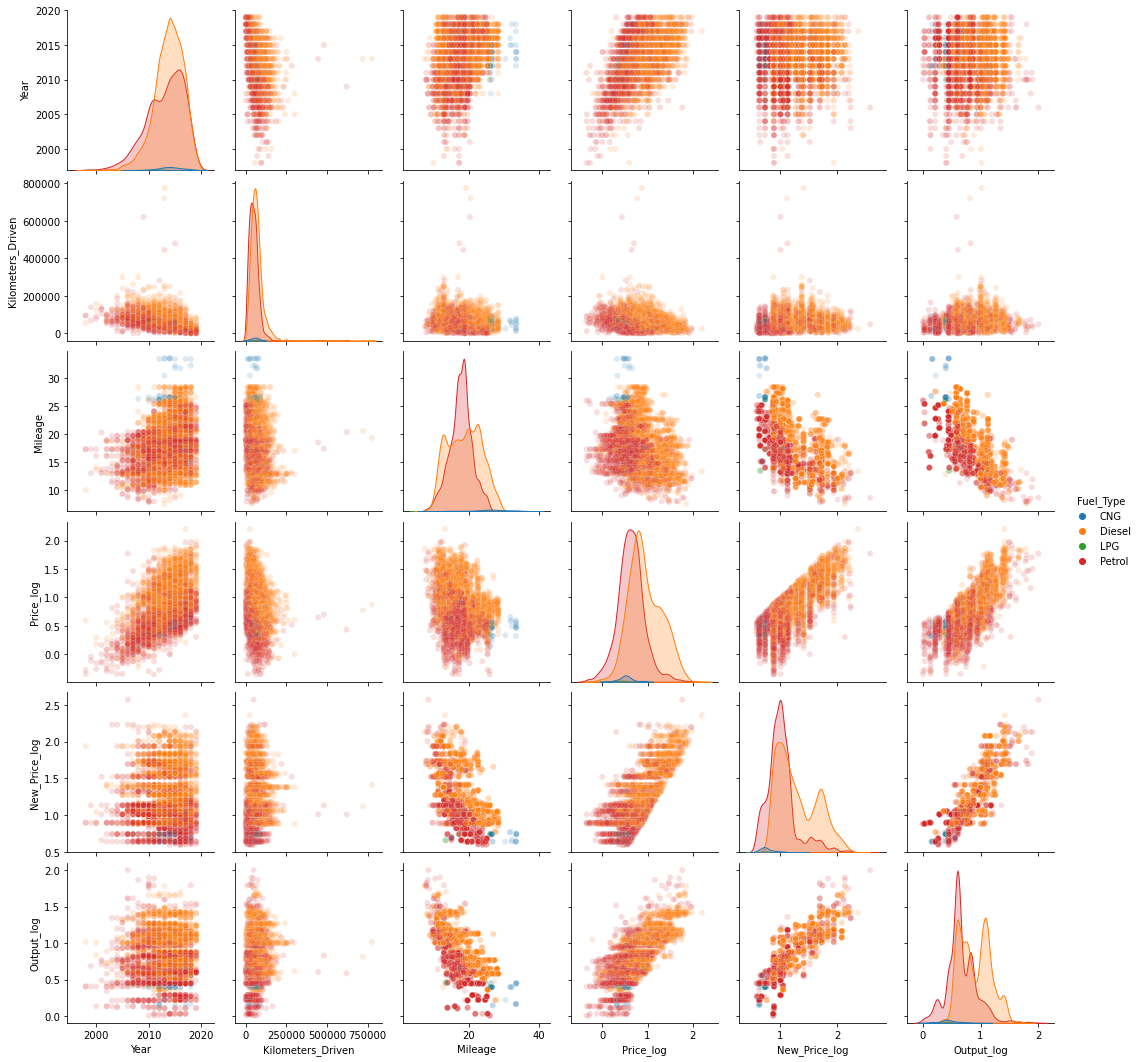

In [71]:
plt.figure(figsize=(12,12))
sns.pairplot(data=cars4u,hue="Fuel_Type",plot_kws={'alpha':0.15},diag_kind="kde")
plt.show()

#### by Transmission

<Figure size 864x864 with 0 Axes>

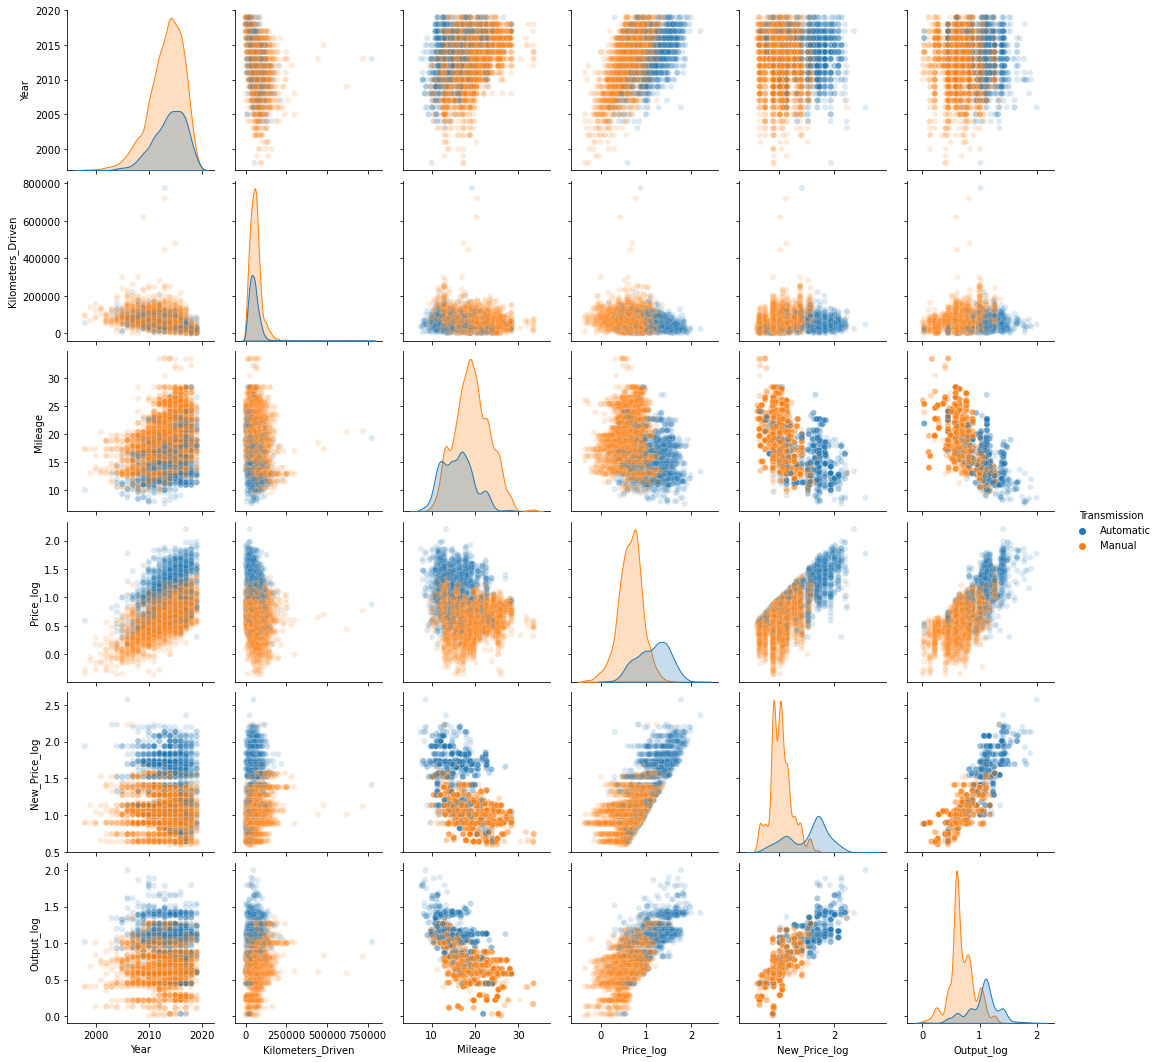

In [72]:
plt.figure(figsize=(12,12))
sns.pairplot(data=cars4u,hue="Transmission",plot_kws={'alpha':0.15},diag_kind="kde")
plt.show()

* It was possible to roughly observe that the distribution of some features, especially according to the transmission method, was clearly divided.

### Price_log vs Fuel_Type

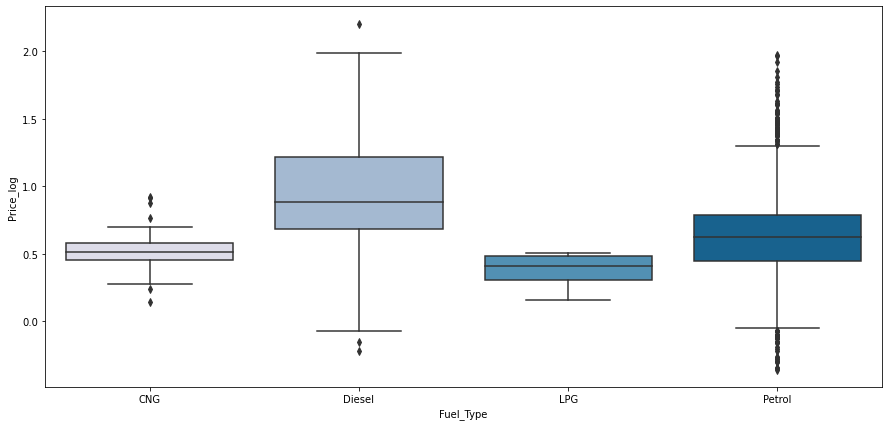

In [73]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cars4u, x='Fuel_Type', y='Price_log',palette="PuBu")
plt.show()

* Based on the fuel type, the tendency of median Price_log to be high in the order of gasoline, LPG, and CNG was confirmed. 
* More simply, the price of an oil-based used car is higher than the price of a gas-based used car.

### Price_log vs Transmission

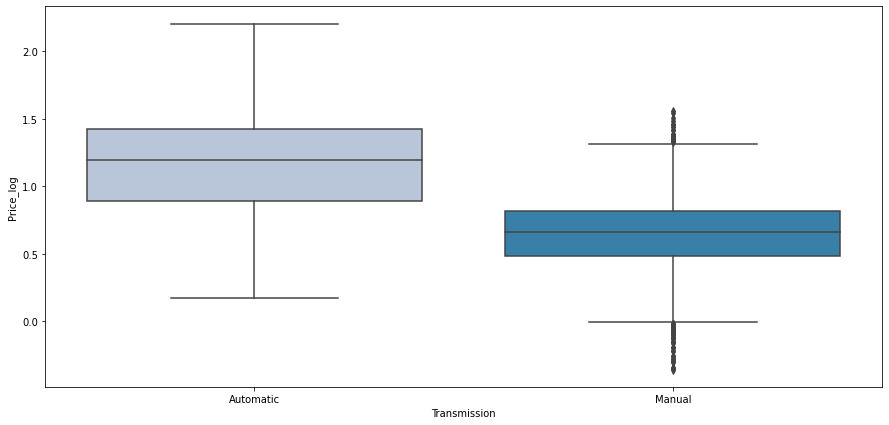

In [74]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cars4u, x='Transmission', y='Price_log',palette="PuBu")
plt.show()

* The median used car price of an automatic transmission appears to be higher than the used car price of manual transmission.

### Price_log vs Owner_Type

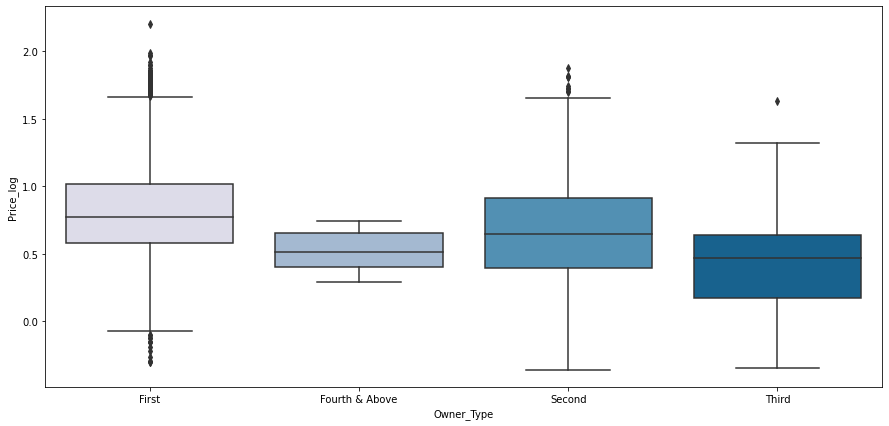

In [75]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cars4u, x='Owner_Type', y='Price_log',palette="PuBu")
plt.show()

* As the number of transfer of ownership increased, a tendency was observed to generally decrease the price of used cars.
* However, in possession of more than 3 times, it does not appear to show a large difference compared to 1 or 2 times.

### Price_log vs Brand_Name

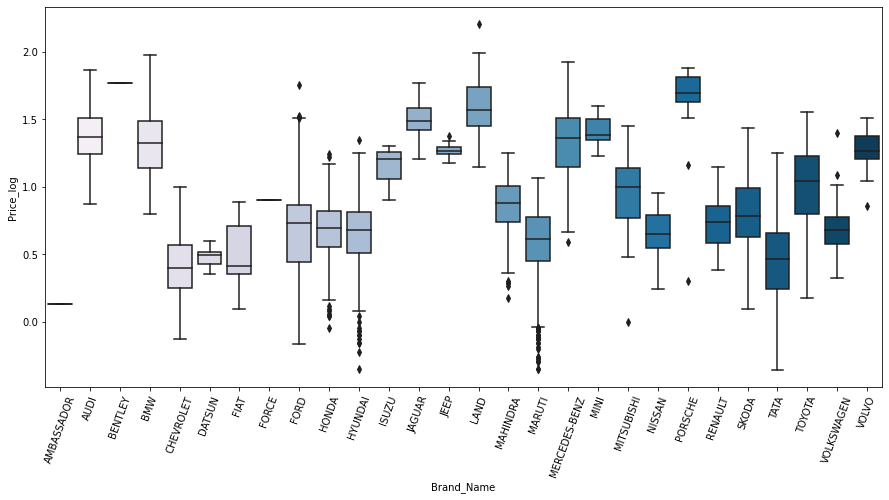

In [76]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cars4u, x='Brand_Name', y='Price_log',palette="PuBu")
plt.xticks(rotation=70)
plt.show()

* Prices between brands have been observed to vary widely.

### Price_log vs Seats_bin

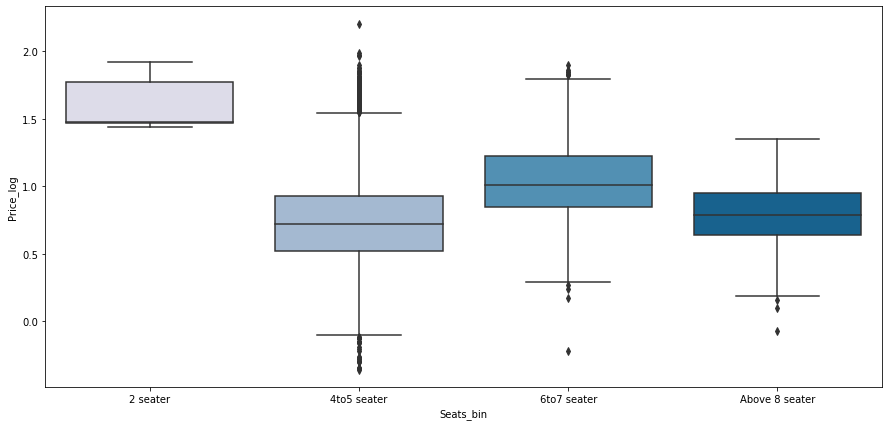

In [77]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cars4u, x='Seats_bin', y='Price_log',palette="PuBu")
plt.show()

* A tendency was observed that the price of used cars varied depending on the number of seats in cars.
* In particular, the price of 2-seater car is relatively high compared to other types.

### Price_log vs Location_bin

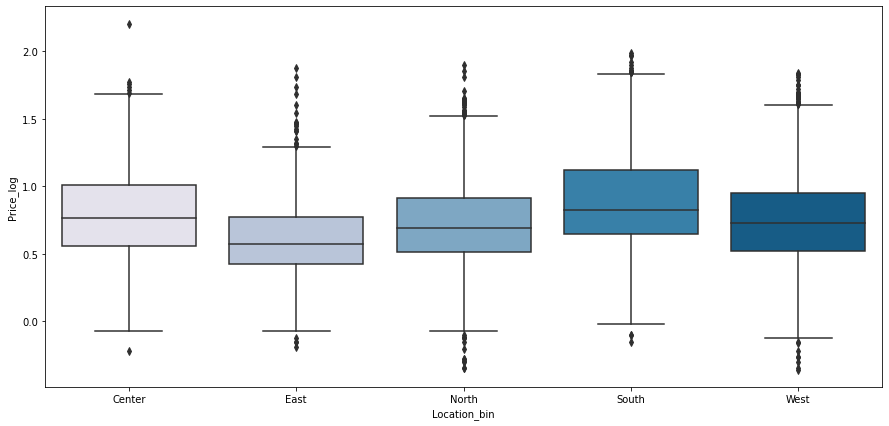

In [78]:
plt.figure(figsize=(15,7))
sns.boxplot(data=cars4u, x='Location_bin', y='Price_log',palette="PuBu")
plt.show()

* Used car prices appear to vary slightly by region.

### Price_log vs Year

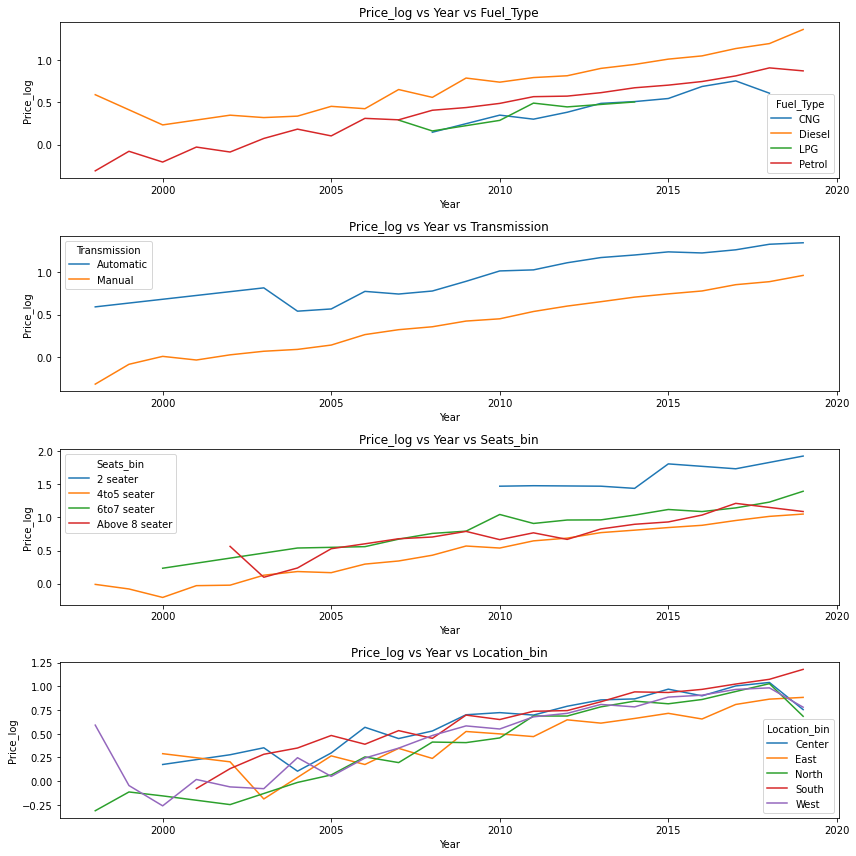

In [79]:
categoric_features = ['Fuel_Type','Transmission','Seats_bin','Location_bin']
plt.figure(figsize=(12,12))

for i, variable in enumerate(categoric_features):
    plt.subplot(4, 1, i + 1)
    sns.lineplot(data=cars4u, x='Year', y='Price_log',ci=None,hue=variable)
    plt.tight_layout()
    plt.title(f'Price_log vs Year vs {variable}')

plt.show()

* The closer you are to a new car, the more used car prices tend to rise.

### Price_log vs Kilometers_Driven

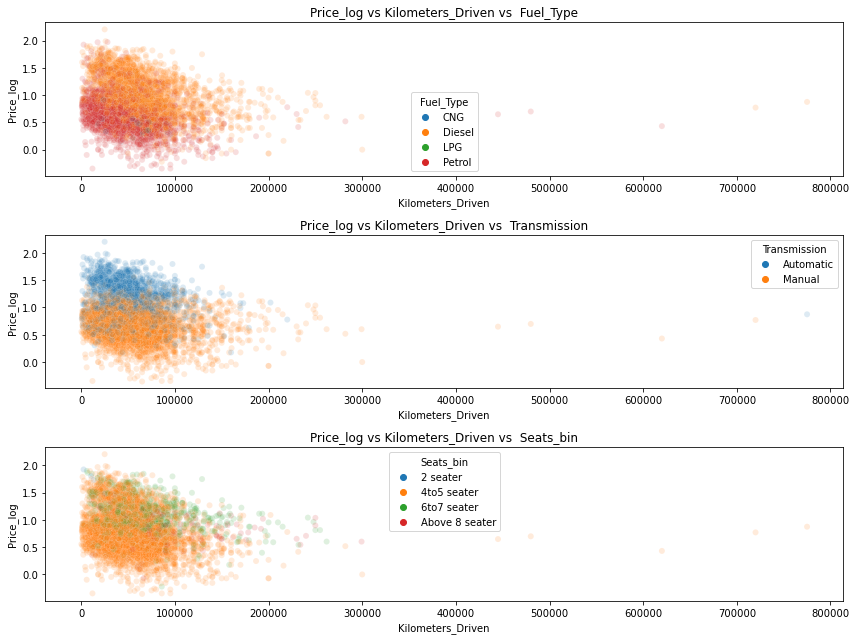

In [80]:
categoric_features = ['Fuel_Type','Transmission','Seats_bin']
plt.figure(figsize=(12,9))

for i, variable in enumerate(categoric_features):
    plt.subplot(3, 1, i + 1)
    sns.scatterplot(data=cars4u, x='Kilometers_Driven', y='Price_log',ci=None,hue=variable,alpha=0.15)
    plt.tight_layout()
    plt.title(f'Price_log vs Kilometers_Driven vs  {variable}')

plt.show()

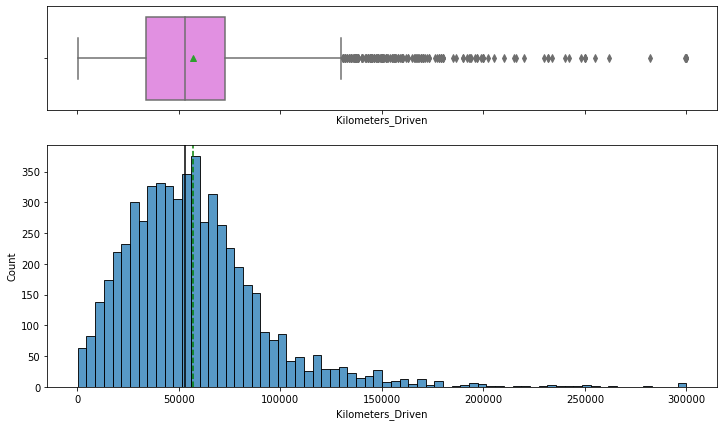

In [81]:
cars4u['Kilometers_Driven'][cars4u[cars4u['Kilometers_Driven']>300000].index] = 300000 # replace >300000 to 300000
hist_box(cars4u,'Kilometers_Driven')

* A negative correlation between Kilometers_Drive and used car prices was observed.
* Kilometers_Driven exceeding 300,000 no longer seems to affect the price, so the maximum has been adjusted based on 300,000 to reduce the effect of outliers in the construction of the model.

### Price_log vs Mileage

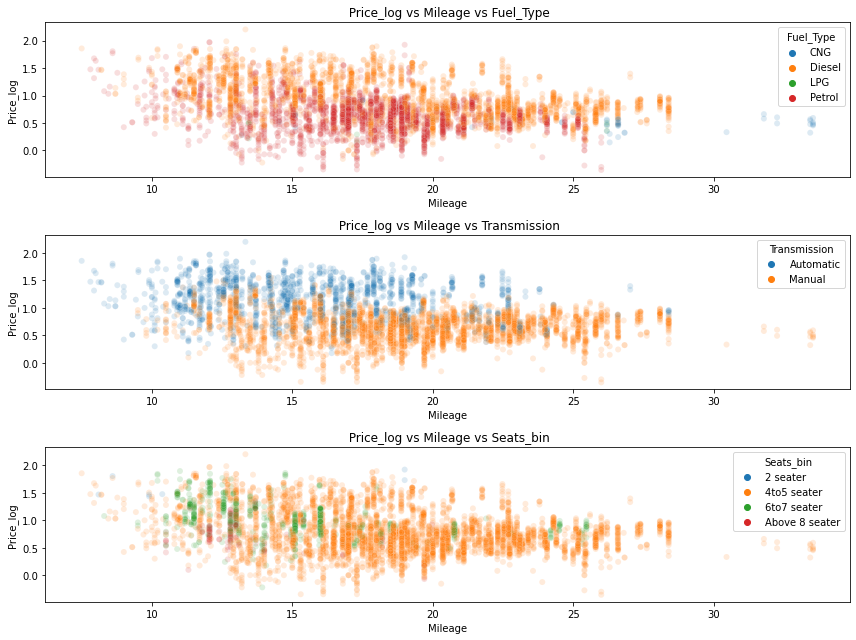

In [82]:
categoric_features = ['Fuel_Type','Transmission','Seats_bin']
plt.figure(figsize=(12,9))

for i, variable in enumerate(categoric_features):
    plt.subplot(3, 1, i + 1)
    sns.scatterplot(data=cars4u, x='Mileage', y='Price_log',ci=None,hue=variable,alpha=0.15)
    plt.tight_layout()
    plt.title(f' Price_log vs Mileage vs {variable}')

plt.show()

* A slight negative correlation between Price_log and Mileage has been observed.
* However, broken it down by category, it seems that the Mileage actually has lower impact on prices.

### Price_log vs Ouput_log

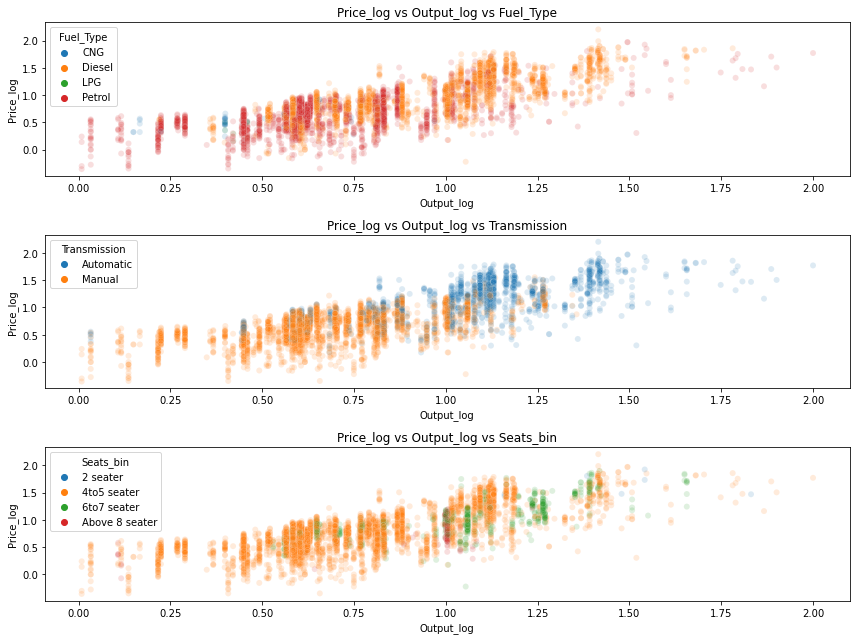

In [83]:
categoric_features = ['Fuel_Type','Transmission','Seats_bin']
plt.figure(figsize=(12,9))

for i, variable in enumerate(categoric_features):
    plt.subplot(3, 1, i + 1)
    sns.scatterplot(data=cars4u, x='Output_log', y='Price_log',ci=None,hue=variable,alpha=0.15)
    plt.tight_layout()
    plt.title(f'Price_log vs Output_log vs {variable}')

plt.show()

* A positive correlation between Price_log and Output_log has been observed.

### Price_log vs New_Price_log

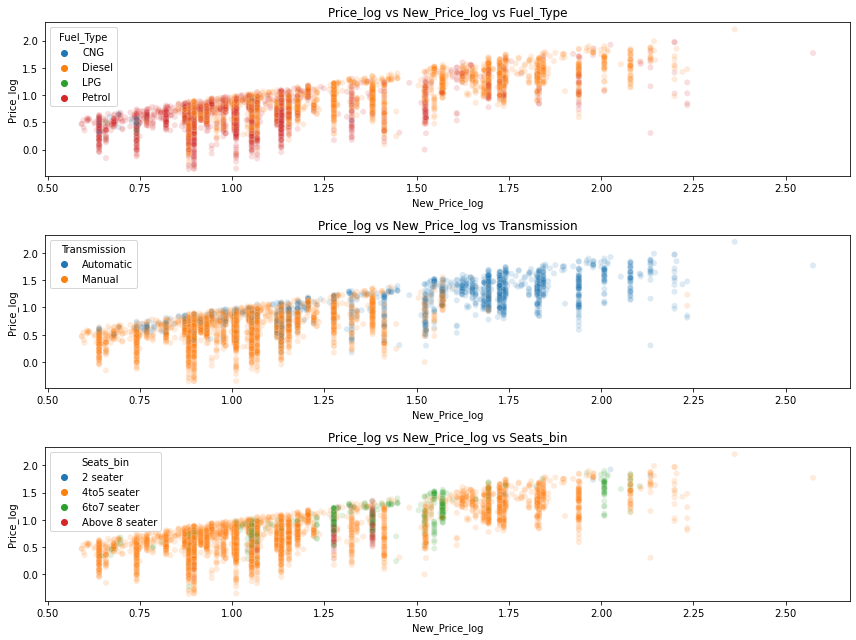

In [84]:
categoric_features = ['Fuel_Type','Transmission','Seats_bin']
plt.figure(figsize=(12,9))

for i, variable in enumerate(categoric_features):
    plt.subplot(3, 1, i + 1)
    sns.scatterplot(data=cars4u, x='New_Price_log', y='Price_log',ci=None,hue=variable,alpha=0.15)
    plt.tight_layout()
    plt.title(f'Price_log vs New_Price_log vs {variable}')

plt.show()

* As used car prices come from new car prices, a positive correlation is observed between the Price_log and New_Price_log.

### Location_bin vs Kilometers_Driven

<AxesSubplot:xlabel='Location_bin', ylabel='Kilometers_Driven'>

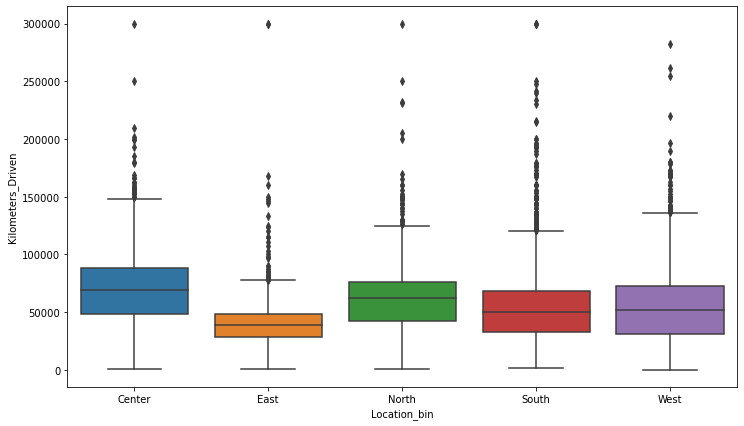

In [85]:
plt.figure(figsize=(12,7))
sns.boxplot(data=cars4u,x='Location_bin',y='Kilometers_Driven')

* In the eastern India, a tendency has been observed to favor used with a lower kilometeres driven.

### Location_bin vs Mileage

<AxesSubplot:xlabel='Location_bin', ylabel='Mileage'>

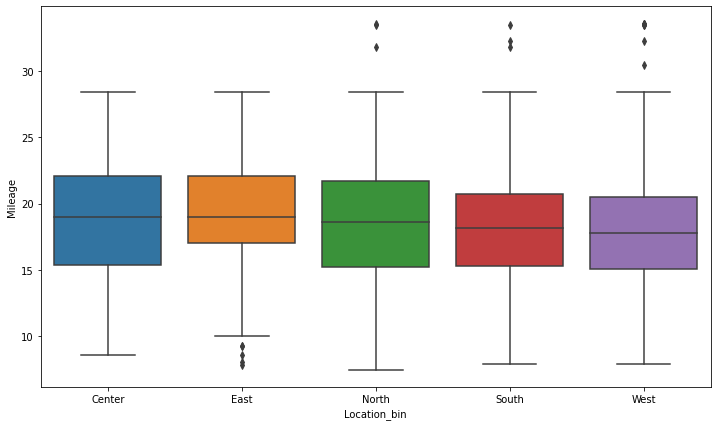

In [86]:
plt.figure(figsize=(12,7))
sns.boxplot(data=cars4u,x='Location_bin',y='Mileage')

### Location_bin vs Output_log

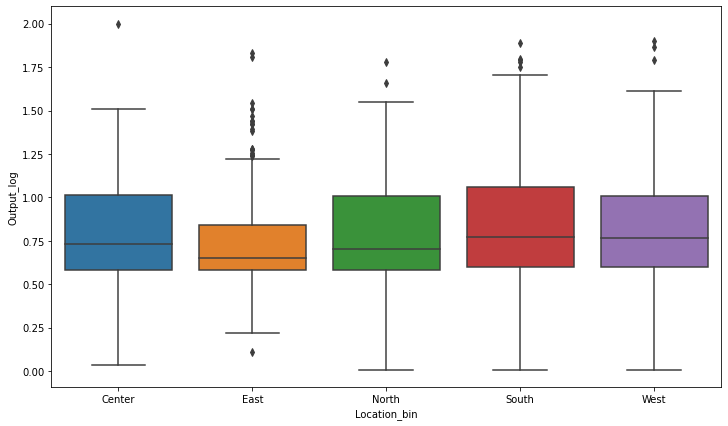

In [87]:
plt.figure(figsize=(12,7))
sns.boxplot(data=cars4u,x='Location_bin',y='Output_log')
plt.show()

### Location_bin vs Fuel_Type

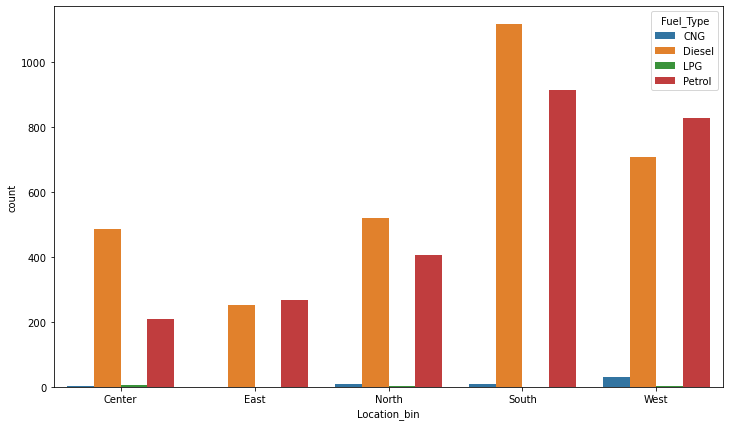

In [88]:
plt.figure(figsize=(12,7))
sns.countplot(data=cars4u,x='Location_bin',hue='Fuel_Type')
plt.show()

* Diesel-based cars are more preferred in central India, northern and southern India, while petrol-based cars are more preferred in eastern and western India.

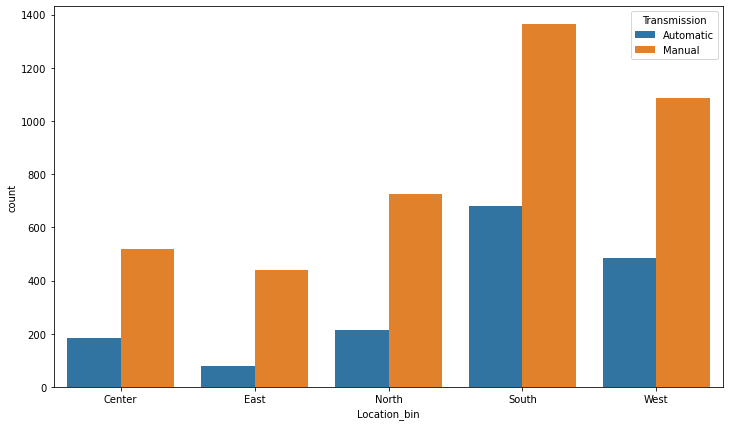

In [89]:
plt.figure(figsize=(12,7))
sns.countplot(data=cars4u,x='Location_bin',hue='Transmission')
plt.show()

* In central, northern and eastern India, automatic transmission cars are preferred over the southern and western India.

### Location_bin vs Owner_Type

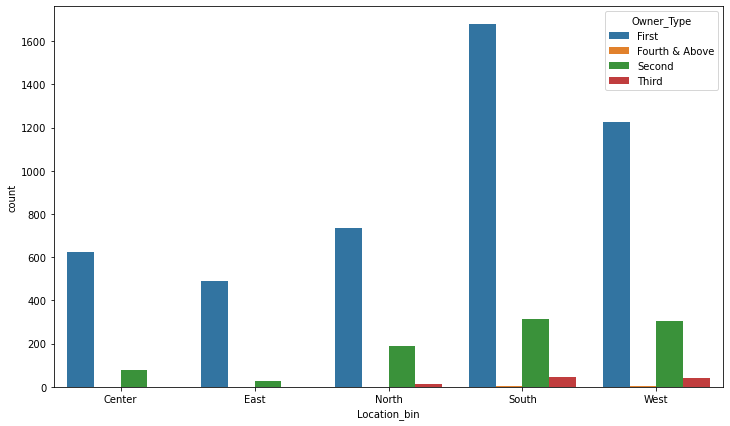

In [90]:
plt.figure(figsize=(12,7))
sns.countplot(data=cars4u,x='Location_bin',hue='Owner_Type')
plt.show()

* In central and eastern India, used cars that have been transferred ownership more than twice are less preferred than in other regions.

### Location_bin vs Seats_bin

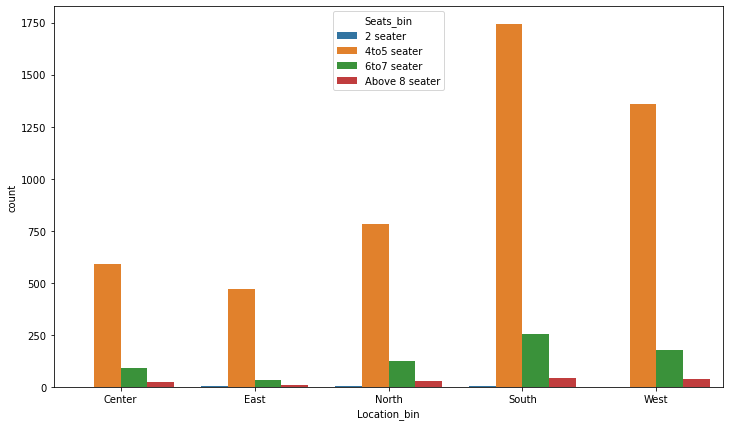

In [91]:
plt.figure(figsize=(12,7))
sns.countplot(data=cars4u,x='Location_bin',hue='Seats_bin')
plt.show()

### Location_bin vs Brand_Name

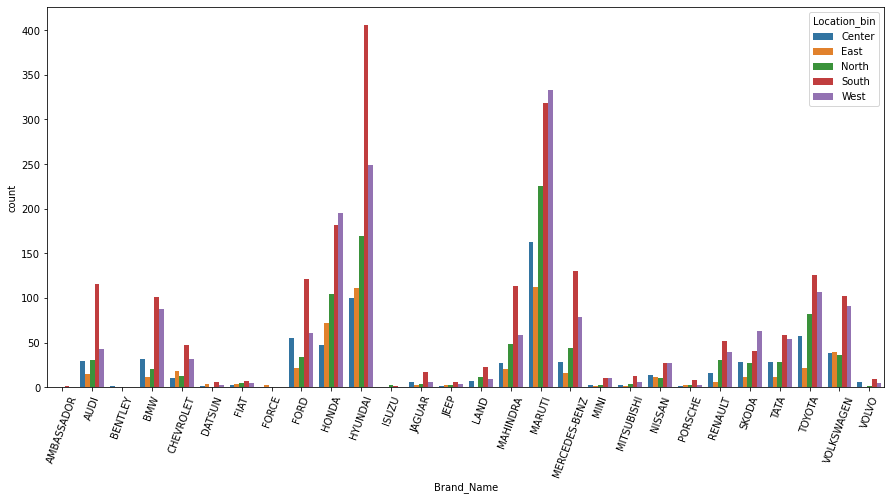

In [92]:
plt.figure(figsize=(15,7))
sns.countplot(data=cars4u,hue='Location_bin',x='Brand_Name')
plt.xticks(rotation=70)
plt.show()

* There were many vehicle brands that were hard to recognize that the top 10 best-selling brands were limited to generate a plot.

In [93]:
cars4u['Brand_Name'].value_counts().head(10)

MARUTI           1151
HYUNDAI          1036
HONDA             600
TOYOTA            394
VOLKSWAGEN        306
MERCEDES-BENZ     297
FORD              293
MAHINDRA          268
BMW               254
AUDI              234
Name: Brand_Name, dtype: int64

In [94]:
top10_brands = ['MARUTI','HYUNDAI','HONDA','TOYOTA','VOLKSWAGEN','MERCEDES-BENZ','FORD','MAHINDRA','BMW','AUDI']

In [95]:
top10_cars4u = cars4u[cars4u['Brand_Name'].isin(top10_brands)]
top10_cars4u['Brand_Name'] = top10_cars4u['Brand_Name'].astype('object').astype('category')

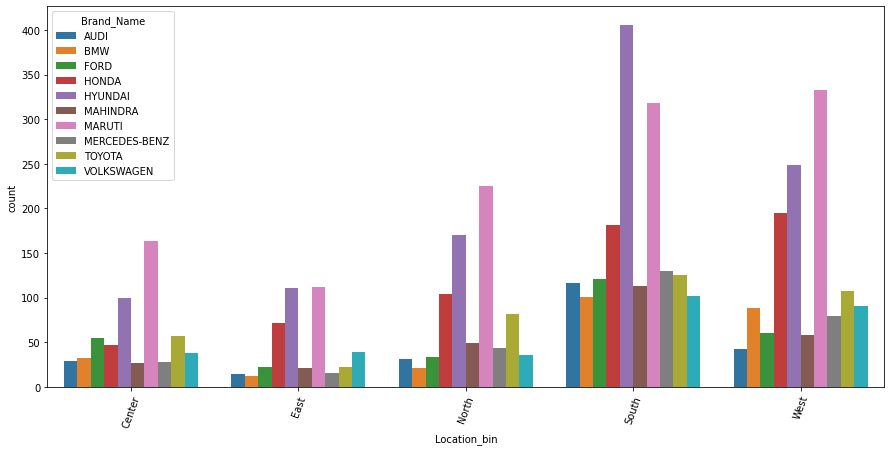

In [96]:
plt.figure(figsize=(15,7))
sns.countplot(data=top10_cars4u,x='Location_bin',hue='Brand_Name')
plt.xticks(rotation=70)
plt.show()

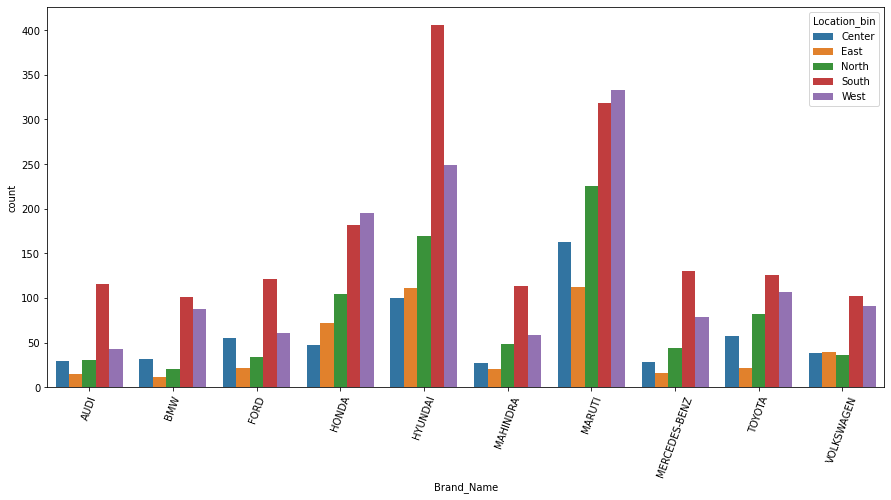

In [97]:
plt.figure(figsize=(15,7))
sns.countplot(data=top10_cars4u,hue='Location_bin',x='Brand_Name')
plt.xticks(rotation=70)
plt.show()

* It has been observed that there is some variation in brand preferences by region.

## Model Building

### Define dependent variable.

In [98]:
X_raw = cars4u.drop(['Price_log','Name'],axis=1) # Price_log : independent variable / Name : variable will not be used.
Y = cars4u['Price_log']

### Creating dummy variables.

In [99]:
X = pd.get_dummies(
    X_raw,
    columns=X_raw.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Kilometers_Driven,Mileage,New_Price_log,Output_log,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,...,Brand_Name_TOYOTA,Brand_Name_VOLKSWAGEN,Brand_Name_VOLVO,Seats_bin_4to5 seater,Seats_bin_6to7 seater,Seats_bin_Above 8 seater,Location_bin_East,Location_bin_North,Location_bin_South,Location_bin_West
0,2010,72000,26.60,0.741152,0.398417,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2015,41000,19.67,1.205746,0.880516,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2011,46000,18.20,0.935003,0.631247,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,2012,87000,20.77,1.051924,0.649190,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,2013,40670,15.20,1.725422,1.016352,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Split the data into train and test

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4040
Number of rows in test data = 1732


### Fitting a linear model with all features.

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

### Model performance check

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets ) * 100 

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, targets):
    """
    Function to compute different metrics to check regression model performance
    model: regressor
    predictors: independent variables
    targets: dependent variable
    """ 
    
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    # log to exp transformation
    
    pred_exp = 10**pred
    targets_exp = 10**targets
    

    r2 = r2_score(targets_exp, pred_exp)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, targets_exp, pred_exp)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(targets_exp, pred_exp))  # to compute RMSE
    mae = mean_absolute_error(targets_exp, pred_exp)  # to compute MAE
    mape = mape_score(targets_exp, pred_exp)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

#### Training Performance

In [106]:
lm_train_perf = model_performance_regression(lm, X_train, Y_train)
lm_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.28992,1.4651,0.900545,0.899399,16.457256


#### Test Performance

In [107]:
lm_test_perf = model_performance_regression(lm, X_test, Y_test)
lm_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.724271,1.568639,0.885969,0.882856,15.969409


#### Model coefficients.

In [108]:
coef_df = pd.DataFrame(
    np.append(lm.coef_, lm.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df.sort_values('Coefficients')

,Coefficients
Intercept,-1.021800e+02
Brand_Name_TATA,-2.848256e-01
Brand_Name_CHEVROLET,-2.798831e-01
Brand_Name_ISUZU,-2.521308e-01
Seats_bin_4to5 seater,-2.376880e-01
Brand_Name_MAHINDRA,-2.236272e-01
Brand_Name_DATSUN,-2.177896e-01
Brand_Name_FIAT,-2.073930e-01
Brand_Name_PORSCHE,-2.038732e-01
Seats_bin_6to7 seater,-2.004675e-01


#### Observations
* The train and test $R^2$ are 0.900 and 0.885, indicating that the model explains about 90% of the total variation in the train and test sets.

* Overall, it shows a good performance and there is little difference between the train set and the test set, which means that it is not overfitting.

* RMSE values on the train and test sets are also comparable.

* MAE indicates that the built linear model is able to predict used car price within a mean error of 1.56 Lahks on the test set.

* MAPE of 15.9 on the test data means that we are able to predict within ~16% of the used car price .

### Expected vs Actual Selling Price by Features

#### Generate DataFrame 

In [109]:
check = cars4u.copy()
Y_pred = lm.predict(X) ## cars4u -> X_raw -> X ; 3 dataframes have same order of information.

In [110]:
# Log-to-Exponential Conversion
check['New_Price'] = 10**check['New_Price_log']
check['Price'] = 10**check['Price_log']
check['Price_pred'] = 10**Y_pred 
check['Ratio'] = check['Price']/check['Price_pred']

#### Predicted selling price VS Actual selling price

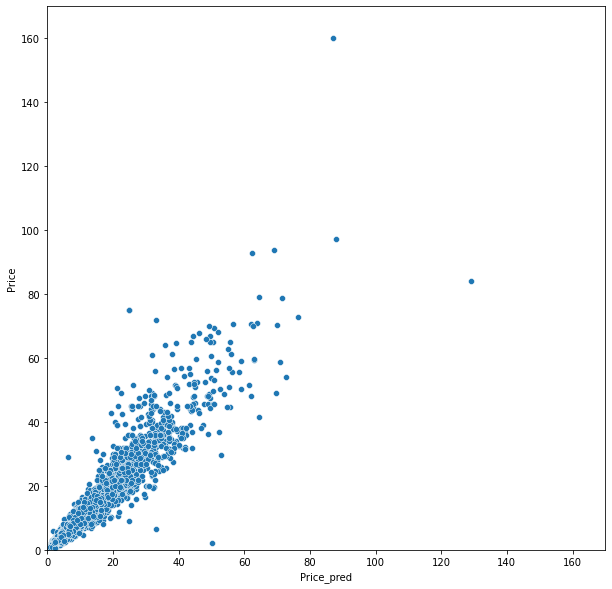

In [111]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=check,x='Price_pred',y='Price')
plt.xlim(0,170)
plt.ylim(0,170)
plt.show()

In [112]:
cars4u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5772 entries, 0 to 5771
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5772 non-null   object  
 1   Year               5772 non-null   int64   
 2   Kilometers_Driven  5772 non-null   int64   
 3   Fuel_Type          5772 non-null   category
 4   Transmission       5772 non-null   category
 5   Owner_Type         5772 non-null   category
 6   Mileage            5772 non-null   float64 
 7   Brand_Name         5772 non-null   category
 8   Seats_bin          5772 non-null   category
 9   Location_bin       5772 non-null   category
 10  Price_log          5772 non-null   float64 
 11  New_Price_log      5772 non-null   float64 
 12  Output_log         5772 non-null   float64 
dtypes: category(6), float64(4), int64(2), object(1)
memory usage: 351.8+ KB


#### Under-estimated price

In [113]:
check[check['Ratio']>2]

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Brand_Name,Seats_bin,Location_bin,Price_log,New_Price_log,Output_log,New_Price,Price,Price_pred,Ratio
206,Audi A8 L 3.0 TDI quattro,2012,56000,Diesel,Automatic,First,11.80,AUDI,4to5 seater,North,1.653213,1.725422,1.399403,53.14,45.00,21.480885,2.094886
310,BMW 6 Series 640d Gran Coupe,2011,30000,Diesel,Automatic,First,9.52,BMW,4to5 seater,West,1.690196,1.740915,1.488840,55.07,49.00,22.410017,2.186522
588,Mahindra Bolero ZLX BSIII,2000,124000,Diesel,Manual,First,13.60,MAHINDRA,6to7 seater,East,0.290035,1.041787,0.836984,11.01,1.95,0.804752,2.423106
846,Audi TT 40 TFSI,2012,7000,Petrol,Automatic,First,14.33,AUDI,4to5 seater,East,1.544068,1.725422,1.191016,53.14,35.00,13.500492,2.592498
2038,Ford Freestyle Titanium Petrol,2007,1261,Petrol,Manual,First,19.00,FORD,4to5 seater,West,0.778151,0.909556,0.652858,8.12,6.00,1.743142,3.442061
2550,Porsche Panamera Diesel,2015,25100,Diesel,Automatic,First,17.85,PORSCHE,4to5 seater,East,1.875061,2.133539,1.469732,136.00,75.00,25.014966,2.998205
2776,Porsche Panamera Diesel,2013,48000,Diesel,Automatic,Second,17.85,PORSCHE,4to5 seater,North,1.703291,2.133539,1.469732,136.00,50.50,21.115603,2.391596
2857,Porsche Panamera 2010 2013 4S,2010,42400,Petrol,Automatic,Third,8.00,PORSCHE,4to5 seater,South,1.632559,2.133539,1.781133,136.00,42.91,19.393283,2.212622
3349,Porsche Panamera Diesel,2013,19828,Diesel,Automatic,Second,17.85,PORSCHE,4to5 seater,South,1.875061,2.133539,1.469732,136.00,75.00,24.975570,3.002934
4864,Mercedes-Benz New C-Class C 200 Kompressor Ele...,2007,43627,Petrol,Automatic,First,11.74,MERCEDES-BENZ,4to5 seater,East,1.462398,1.694517,1.076037,49.49,29.00,6.207097,4.672071


#### Over-estimated price

In [114]:
check[check['Ratio']<0.3]

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Brand_Name,Seats_bin,Location_bin,Price_log,New_Price_log,Output_log,New_Price,Price,Price_pred,Ratio
2935,BMW 3 Series 320d Luxury Line,2019,87000,Diesel,Automatic,First,22.69,BMW,4to5 seater,North,0.824126,1.719828,1.130121,52.46,6.67,33.170859,0.201080
3005,Porsche Cayenne Base,2019,14298,Petrol,Automatic,First,13.33,PORSCHE,4to5 seater,South,0.305351,2.133539,1.518884,136.00,2.02,50.281422,0.040174
5744,Tata New Safari DICOR 2.2 VX 4x2,2008,86000,Diesel,Manual,Third,13.93,TATA,6to7 seater,West,-0.221849,0.882525,1.054135,7.63,0.60,2.194689,0.273387


#### Observations
 * It has been observed that many of Porsche used car prices are formed more than 2 times higher than the expected price, which may mean that a premium price is formed for a particular brand.
 * It was found that some used cars had a sales price that was very low than the expected price, which was difficult to explain with the data given.

## Feature selection

### Forward feature selection using SequentialFeatureSelector

In [115]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [116]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=X_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5, ## 5-fold cross-validataion
)

# Perform SFFS
sfs = sfs.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    2.2s finished

[2022-05-31 02:56:34] Features: 1/46 -- score: 0.6153473122739281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished

[2022-05-31 02:56:35] Features: 2/46 -- score: 0.8674967941326553[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  44 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.0s finished

[2022-05-31 02:56:35] Features: 3/46 -- score: 0.8933681014226609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  43 | elapsed:    0.0s

[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2022-05-31 02:56:39] Features: 33/46 -- score: 0.9370284202513715[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-05-31 02:56:39] Features: 34/46 -- score: 0.9370550987301233[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-05-31 02:56:39] Features: 35/46 -- score: 0.9370722838871199[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 ou

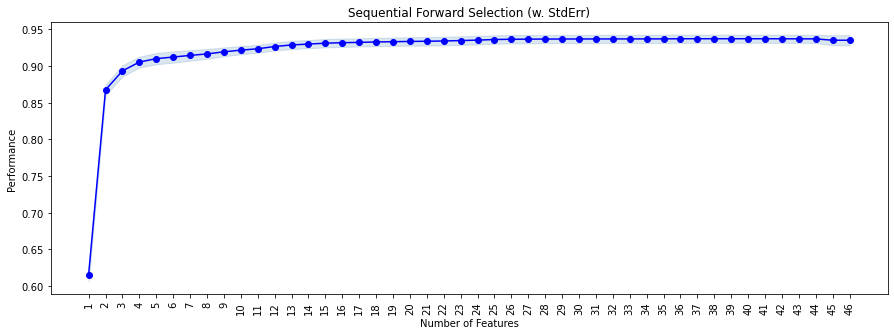

In [117]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

* It was observed that performance increases till the 15th feature and then slowly becomes constant.
* WIth 5 features, adjusted $R^2$ is 0.910. ( logged Price )
* With 15 features, adjusted $R^2$ is 0.931. ( logged Price )
* With 30 features, adjusted $R^2$ is 0.936. ( logged Price )
* With 46 features, adjusted $R^2$ is 0.935. ( logged Price )

### Fitting a linear model with selected features.

In [118]:
lm_sfs = LinearRegression()

In [119]:

# Build step forward feature selection
sfs = SFS(
    lm_sfs,
    k_features=15,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  46 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.0s finished

[2022-05-31 02:56:42] Features: 1/15 -- score: 0.6153473122739281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished

[2022-05-31 02:56:42] Features: 2/15 -- score: 0.8674967941326553[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:    0.0s finished

[2022-05-31 02:56:42] Features: 3/15 -- score: 0.8933681014226609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  43 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    0.0s finished

[2022-05-31 02:56:42] Features: 4/15 -- score: 0.90

In [120]:
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
X_train.columns[feat_cols]

[0, 1, 3, 4, 5, 8, 15, 26, 27, 29, 34, 35, 42, 43, 45]


Index(['Year', 'Kilometers_Driven', 'New_Price_log', 'Output_log',
       'Fuel_Type_Diesel', 'Transmission_Manual', 'Brand_Name_CHEVROLET',
       'Brand_Name_MAHINDRA', 'Brand_Name_MARUTI', 'Brand_Name_MINI',
       'Brand_Name_SKODA', 'Brand_Name_TATA', 'Location_bin_East',
       'Location_bin_North', 'Location_bin_West'],
      dtype='object')

In [121]:
X_train_final = X_train[X_train.columns[feat_cols]]
X_test_final = X_test[X_train_final.columns]

In [122]:
lm_sfs.fit(X_train_final,Y_train)

LinearRegression()

* Based on the results of the feature selection, it appears that the car year, the distance traveled, the price of the new car, the output of the car and the type of fuel are the 5 most important factors in predicting the price of a used car.

#### Training performace

In [123]:
print("Training Performance\n")
lm_sfs_train_perf = model_performance_regression(
    lm_sfs, X_train_final, Y_train
)
lm_sfs_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.544006,1.539063,0.88459,0.88416,17.716077


#### Test performace

In [124]:
print("Test Performance\n")
lm_sfs_test_perf = model_performance_regression(
    lm_sfs, X_test_final, Y_test
)
lm_sfs_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.085206,1.50785,0.921746,0.921062,16.406341


#### Performance comparison

In [125]:

models_comp_df = pd.concat(
    [lm_train_perf.T, lm_test_perf.T, lm_sfs_train_perf.T,  lm_sfs_test_perf.T],
    axis=1,
)

models_comp_df.columns = [
    "Sklearn (Training)",
    "Sklearn (Test)",
    "SFS features (Training)",
    "SFS features (Test)",
]

print("Performance comparison:")
models_comp_df

Performance comparison:


,Sklearn (Training),Sklearn (Test),SFS features (Training),SFS features (Test)
RMSE,3.289920,3.724271,3.544006,3.085206
MAE,1.465100,1.568639,1.539063,1.507850
R-squared,0.900545,0.885969,0.884590,0.921746
Adj. R-squared,0.899399,0.882856,0.884160,0.921062
MAPE,16.457256,15.969409,17.716077,16.406341


#### Observations
 * With feature selection, similar performance was achieved using only about 1/3 of the features.
 * The performance validated by the test set was rather better with fewer selected features.

## Conclusion

* Used car preference tendencies were observed as follows by region.
  * Center
    * Relative non-preference for used cars that have been transferred ownership more than 2 times
    * Prefer diesel-based cars.
    * Relatively less sensitive to driving distance.
  * East : 
    * Relative non-preference for used cars with long driving distances
    * Relative non-preference for used cars that have been transferred ownership more than 2 times.
    * Relative non-preference for automatic transmission cars
    * Least used car deals
    * Lowest used car sales price
  * West : 
    * Preference for petrol-based cars.
  * South :
    * Most used car deals.
    * Highest used car sales price.
    * Relative preference for automatic transmission cars.
  * North : 
    * No characteristic tendencies are observed compared to other regions.
    

* The use year, the distance traveled, the price of the new car, the output of the car and the type of fuel are the 5 most important factors in predicting the price of a used car.


* A model to predict the price of used cars was built with an $R2$ of 0.900, 0.885 on the training and test set.


* Cars4U can use this model to predict the price of used car within a mean error of 1.56 Lakhs on the test set.


* With only a few key features, a high-performance model could be implemented efficiently.


* However, certain car models, such as the Porsche Panamera, tend to deviate from the price prediction model due to premium pricing.


* In addition, in some vehicles, sales prices that cannot be explained by the current data alone have been observed, which is expected to be supplemented by the addition of information such as accident history.

## Business Recommendations

* By adding information such as accident history and convenience equipment to the data for predicting the price of used cars, it will be possible to build a more accurate model.


* The cost of refurbishment before the sale of used cars should be taken into account.


* Since the brands that are mainly traded are clear, it is recommended to sell used car mainly on the preferred brands.


* It is recommended to start with the southern and western India, where vehicle sales are high and sales prices are relatively high, and to build a foothold.


* In line with the trend of preference for used cars in the southern and western India, it is recommended to start a business mainly on gasoline vehicles with automatic transmissions.

    
* For certain high-priced cars that deviate from the price prediction model, it is recommended to price used cars separately.